In [1]:
# 1) ultralytics 설치 (YOLOv8)
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00


포즈 추정할 이미지를 업로드해주세요 (사람이 포함된 이미지):


Saving IMG_1650.JPG to IMG_1650 (1).JPG
업로드된 파일: IMG_1650 (1).JPG

image 1/1 /content/IMG_1650 (1).JPG: 480x640 1 person, 42.2ms
Speed: 3.1ms preprocess, 42.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


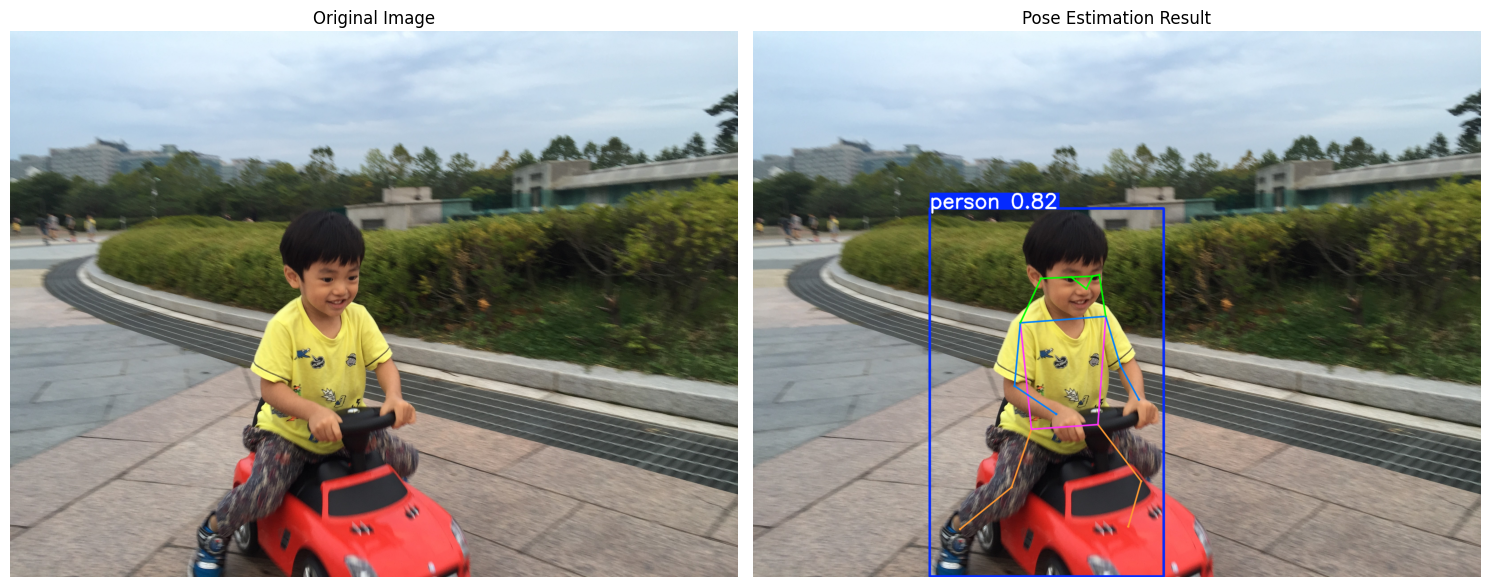


=== 감지된 키포인트 좌표 ===

총 1명의 사람이 감지되었습니다.

--- 사람 1 ---
         코: (1494.2, 1155.6)
       왼쪽눈: (1522.5, 1099.2)
      오른쪽눈: (1426.8, 1103.8)
       왼쪽귀: (1552.2, 1093.5)
      오른쪽귀: (1291.5, 1109.5)
      왼쪽어깨: (1581.7, 1279.3)
     오른쪽어깨: (1198.6, 1308.4)
     왼쪽팔꿈치: (1647.5, 1500.6)
    오른쪽팔꿈치: (1172.3, 1591.3)
      왼쪽손목: (1730.8, 1652.6)
     오른쪽손목: (1359.3, 1717.2)
     왼쪽엉덩이: (1546.2, 1764.8)
    오른쪽엉덩이: (1248.1, 1785.3)
      왼쪽무릎: (1740.2, 2018.3)
     오른쪽무릎: (1159.5, 2045.4)
      왼쪽발목: (1682.2, 2221.1)
     오른쪽발목: (928.1, 2233.4)


In [3]:
# 2단계: 이미지 직접 업로드 방식 (가장 확실함)
from google.colab import files
import os

print("포즈 추정할 이미지를 업로드해주세요 (사람이 포함된 이미지):")
uploaded = files.upload()

if uploaded:
    # 업로드된 첫 번째 파일 사용
    image_filename = list(uploaded.keys())[0]
    print(f"업로드된 파일: {image_filename}")

    # 3단계: YOLO 포즈 추정 실행
    from ultralytics import YOLO
    import matplotlib.pyplot as plt
    import cv2

    # 모델 로드
    model = YOLO('yolov8n-pose.pt')

    # 포즈 추정 실행
    results = model(image_filename)

    # 결과 시각화
    plt.figure(figsize=(15, 10))

    for i, r in enumerate(results):
        # 원본 이미지
        img = cv2.imread(image_filename)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title('Original Image')
        plt.axis('off')

        # 포즈 추정 결과
        annotated = r.plot()
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 2, 2)
        plt.imshow(annotated_rgb)
        plt.title('Pose Estimation Result')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

     # 키포인트 좌표 출력
    print("\n=== 감지된 키포인트 좌표 ===")

    keypoint_names = [
        "코", "왼쪽눈", "오른쪽눈", "왼쪽귀", "오른쪽귀",
        "왼쪽어깨", "오른쪽어깨", "왼쪽팔꿈치", "오른쪽팔꿈치",
        "왼쪽손목", "오른쪽손목", "왼쪽엉덩이", "오른쪽엉덩이",
        "왼쪽무릎", "오른쪽무릎", "왼쪽발목", "오른쪽발목"
    ]

    for i, r in enumerate(results):
        if r.keypoints is not None and len(r.keypoints.xy) > 0:
            print(f"\n총 {len(r.keypoints.xy)}명의 사람이 감지되었습니다.")

            for person_idx, keypoints in enumerate(r.keypoints.xy):
                print(f"\n--- 사람 {person_idx + 1} ---")

                for kp_idx, (x, y) in enumerate(keypoints):
                    if x > 0 and y > 0 and kp_idx < len(keypoint_names):
                        print(f"{keypoint_names[kp_idx]:>10}: ({x:.1f}, {y:.1f})")
        else:
            print("사람의 포즈를 감지하지 못했습니다.")
            print("다른 이미지(사람이 명확히 보이는 이미지)를 시도해보세요.")
else:
    print("파일이 업로드되지 않았습니다.")



image 1/1 /content/IMG_1650.JPG: 480x640 5 persons, 1 motorcycle, 17.6ms
Speed: 2.9ms preprocess, 17.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


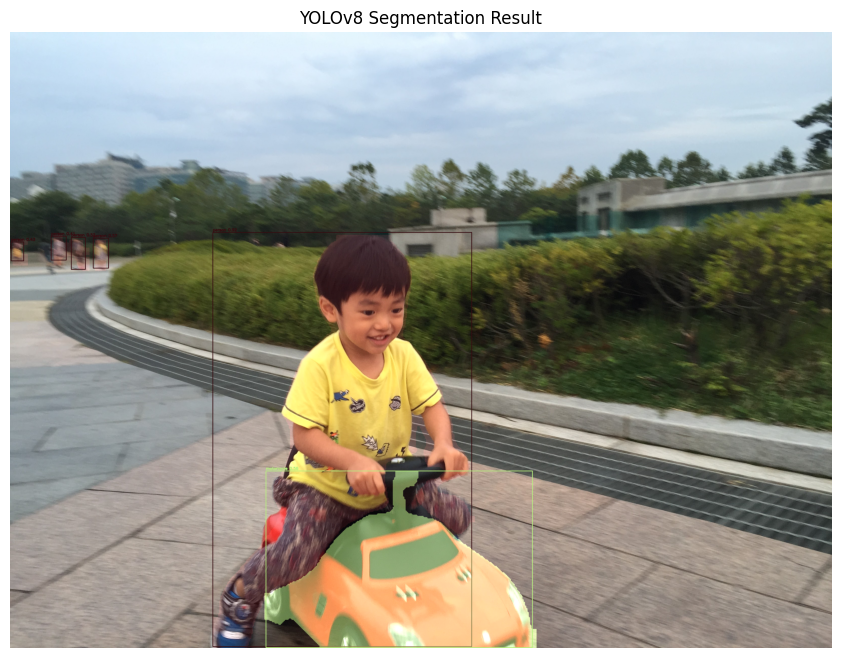

In [6]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 모델 로드
model = YOLO("yolov8s-seg.pt")  # yolov8n-seg.pt 등으로 변경 가능

# 2. 이미지 로드 및 예측
image_path = '/content/IMG_1650.JPG'
results = model(image_path)

# 3. 결과 객체 가져오기 (단일 이미지 기준)
result = results[0]

# 원본 이미지 불러오기
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # matplotlib용 RGB 변환

# 4. 마스크 및 박스 정보를 사용해서 overlay
masks = result.masks.data.cpu().numpy()  # (N, H, W)
boxes = result.boxes
class_ids = boxes.cls.cpu().numpy().astype(int)
confidences = boxes.conf.cpu().numpy()

# 클래스 이름 매핑
names = result.names



# 색상 팔레트 만들기
palette = np.random.randint(0, 255, size=(len(names), 3), dtype=np.uint8)

# 마스크와 바운딩 박스 그리기
for i in range(len(masks)):
    mask = masks[i]
    color = palette[class_ids[i]].tolist()

    # 원본 이미지 크기
    H, W, _ = image.shape

    # 마스크 리사이즈
    mask_resized = cv2.resize(mask.astype(np.float32), (W, H), interpolation=cv2.INTER_LINEAR)
    mask_resized = (mask_resized > 0.5).astype(np.uint8)  # 이진화

    # 색상 덧입히기
    colored_mask = np.zeros_like(image, dtype=np.uint8)
    for c in range(3):
        colored_mask[:, :, c] = mask_resized * color[c]

    # Overlay
    image = cv2.addWeighted(image, 1.0, colored_mask, 0.5, 0)

    # 박스 좌표도 동일하게 사용 가능 (YOLO는 박스 좌표는 원본 기준임)
    xyxy = boxes.xyxy[i].cpu().numpy().astype(int)
    x1, y1, x2, y2 = xyxy
    label = f"{names[class_ids[i]]} {confidences[i]:.2f}"
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, label, (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# 5. 결과 시각화
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.title("YOLOv8 Segmentation Result")
plt.show()